# Lecture 16
_____________


In [18]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from scipy.stats import skew, norm

## _Climate change - analyze data_

Streamflow projections for the Colorado River at the Grand Canyon from USBR database

Define conversion factors

In [19]:
cfs_tafd = 2.29568411*10**-5 * 86400 / 1000

Load data. Combine first three columns into a datetime index.

In [24]:
df = pd.read_csv('data/streamflow_cmip5_ncar_day_GRAND.csv', 
                  index_col='datetime',
                  parse_dates={'datetime': [0,1,2]})

Example - filter columns by `rcp`

In [12]:
# df = df.filter(like='rcp85') 

Annual rolling mean - method chaining

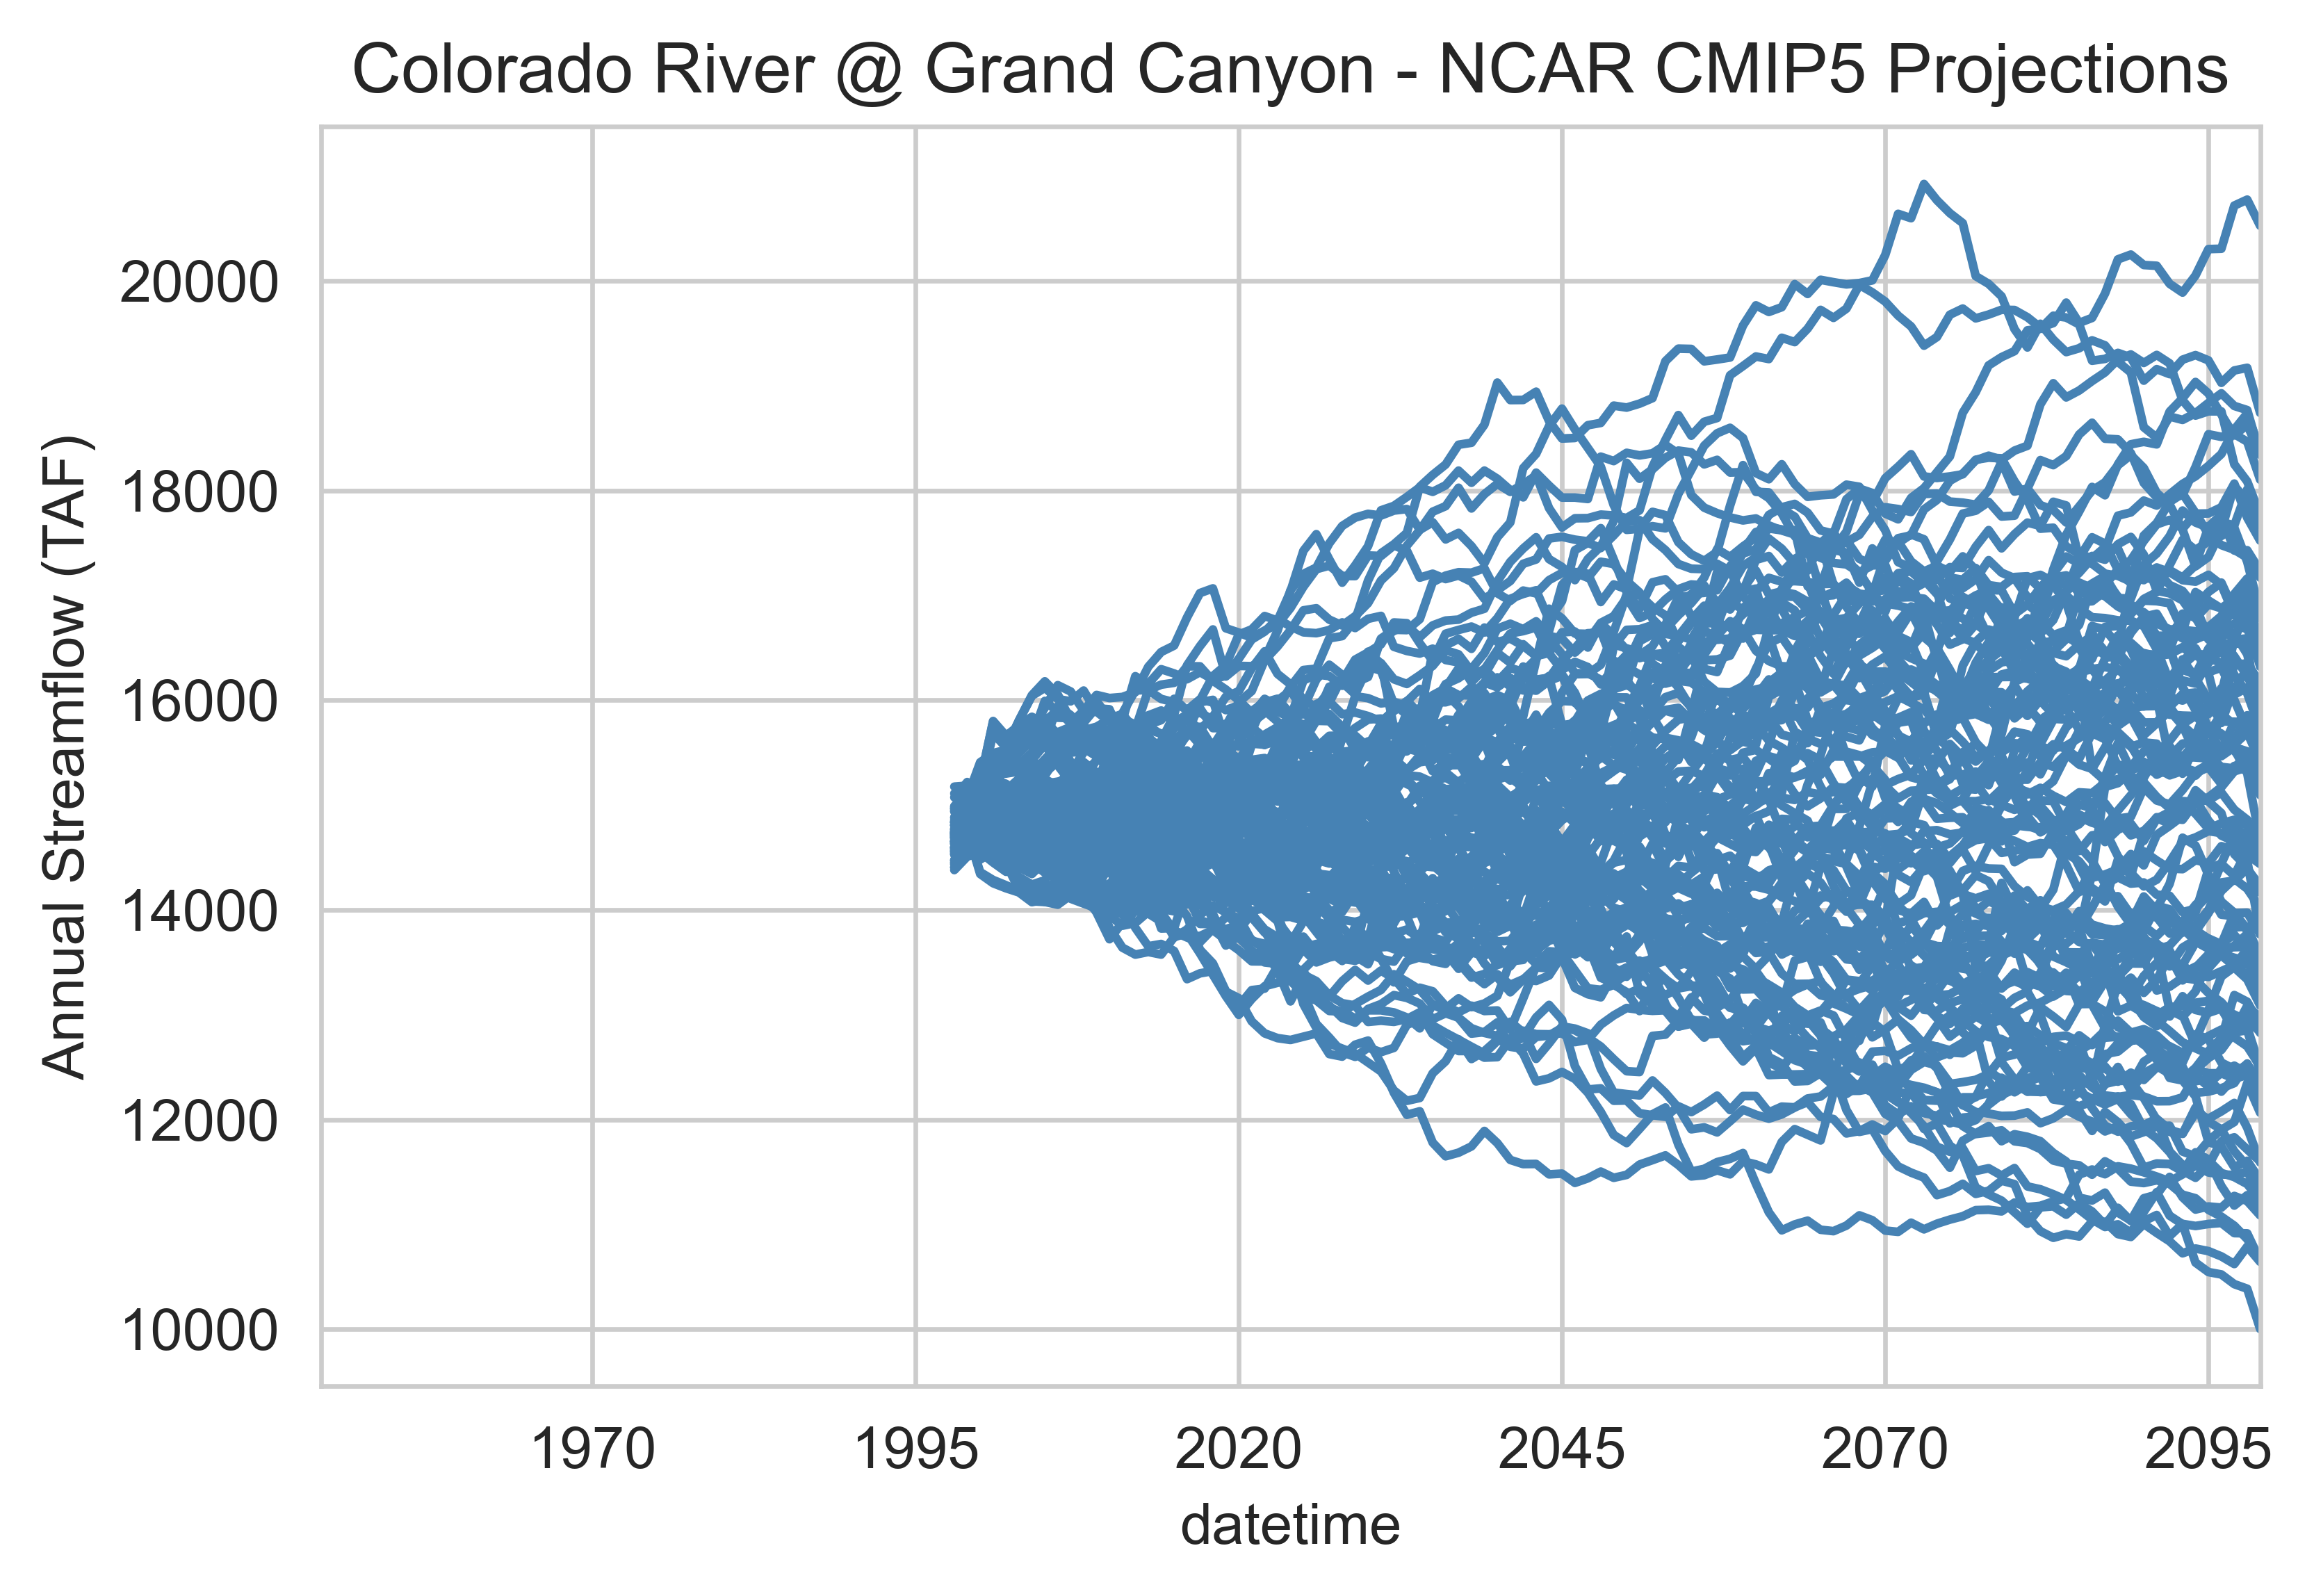

In [13]:
annual = ((df * cfs_tafd).resample('AS-OCT').sum() 
           .rolling(window=50) 
           .mean())

annual.plot(color='steelblue', legend=None)
plt.title('Colorado River @ Grand Canyon - NCAR CMIP5 Projections')
plt.ylabel('Annual Streamflow (TAF)')
plt.show()

100-year flood estimate (using LP3 distribution)

In [14]:
def lp3(Q, ppf=0.99):
    # estimate flood with nonexceedance probability `ppf`
    Q = np.log(Q)
    m = Q.mean()
    s = Q.std()
    g = skew(Q)
    
    # Frequency factor Kp, HH 18.2.29
    Kp = (2/g)*(1 + g*norm.ppf(ppf)/6 - g**2/36)**3 - 2/g
    return np.exp(m + s*Kp)

Estimate 100-year flood using a rolling window - method chaining

In [15]:
Q100 = (df.resample('A') # resample to annual
        .max() # take annual max
        .rolling(window=50) # a 50-year rolling average
        .apply(lp3, raw=True)) # raw=True passes numpy array to lp3 function

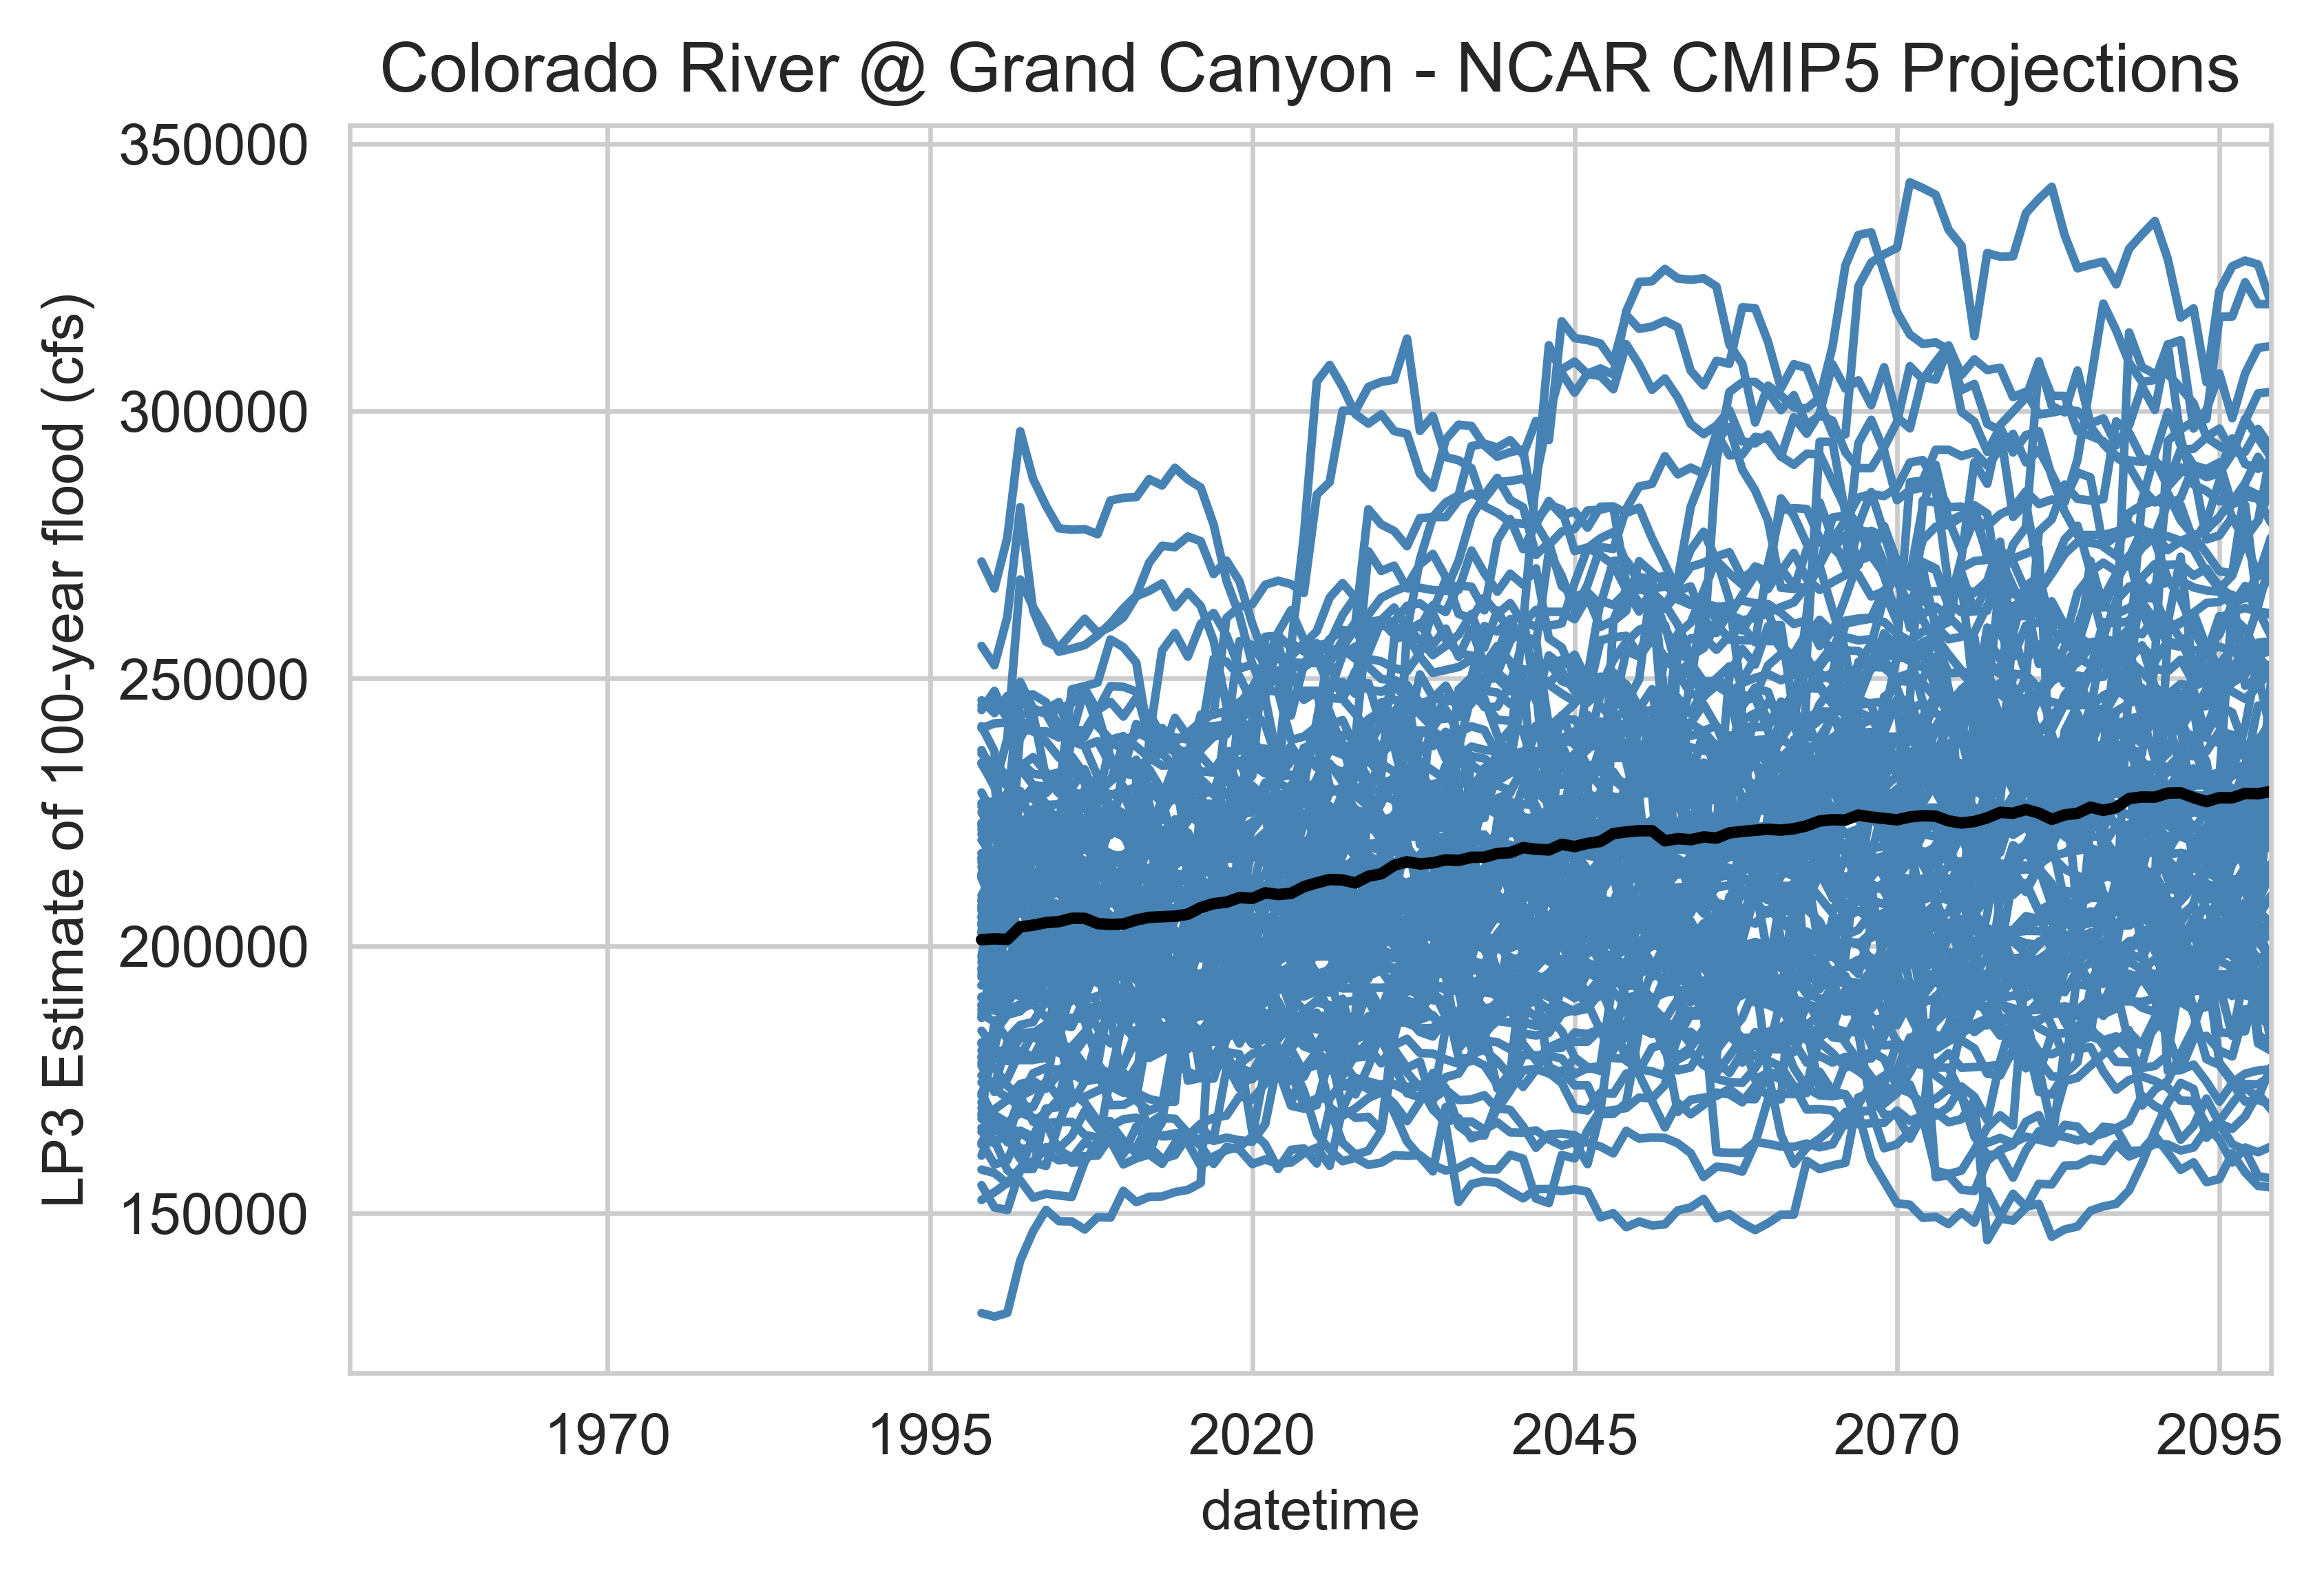

In [16]:
Q100.plot(color='steelblue', legend=None)
Q100.mean(axis=1).plot(color='k', linewidth=2)
plt.title('Colorado River @ Grand Canyon - NCAR CMIP5 Projections')
plt.ylabel('LP3 Estimate of 100-year flood (cfs)')
plt.show()

----------------